In [1]:
import domain_adapt_run.domain_adapt_run.constants as constants
cache_folder_name = 'data_1d_sampling'
seed = 42

In [2]:
import numpy as np
np.random.seed(seed)
import python_utils.python_utils.basic as basic
import python_utils.python_utils.caching as caching
log_folder = '%s/%s' % (constants.cache_folder, cache_folder_name)
caching.init(constants.cache_folder, constants.which_hash, basic.archiver(log_folder))
%load_ext autoreload
%autoreload 2

[Errno 17] File exists: '/Users/fultonw/Documents/projects/runs/domain_adapt_run/cache/data_1d_sampling'


In [3]:
import matplotlib.pyplot as plt
import matplotlib
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import display_pretty, display_html
import python_utils.python_utils.basic as basic
import pandas as pd
import pdb
import itertools
import functools
import scipy.stats
import cvxopt
import functools
import domain_adapt.domain_adapt.KR_metric as KR_metric
import domain_adapt.domain_adapt.data as data
import data.mushroom.mushroom.fxns as uci_data

In [4]:
# get data
xs, ys = uci_data.whitewine_data()
print 'shape', xs.shape
pd.DataFrame(xs).head()

shape (4898, 11)


,0,1,2,3,4,5,6,7,8,9,10
0,7.0,0.27,0.36,20.7,0.045,45,170,1.0010,3.00,0.45,8.8
1,6.3,0.30,0.34,1.6,0.049,14,132,0.9940,3.30,0.49,9.5
2,8.1,0.28,0.40,6.9,0.050,30,97,0.9951,3.26,0.44,10.1
3,7.2,0.23,0.32,8.5,0.058,47,186,0.9956,3.19,0.40,9.9
4,7.2,0.23,0.32,8.5,0.058,47,186,0.9956,3.19,0.40,9.9


In [5]:
# get 1d pca version
us = data.pca(xs,1,True)[:,0]
print 'us shape', us.shape

us shape (4898,)


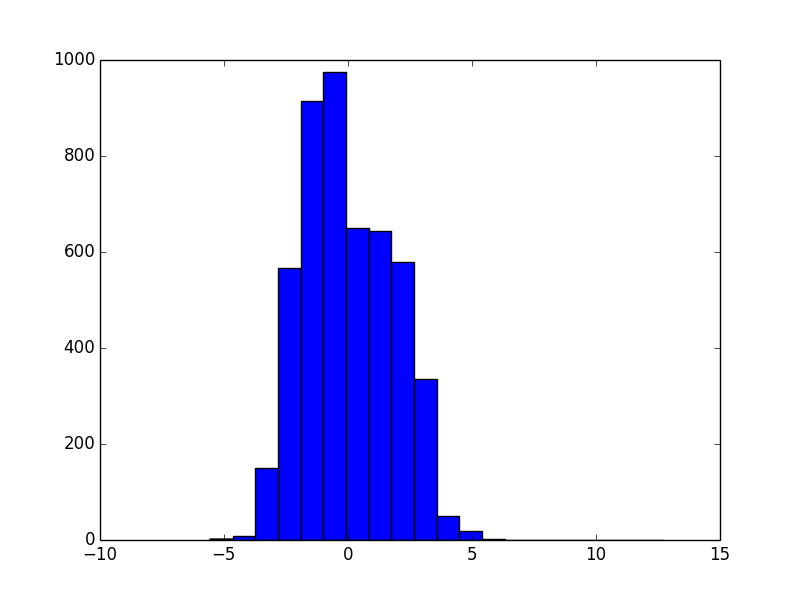

In [6]:
# histogram of us
fig,ax = plt.subplots()
ax.hist(us,bins=20)
basic.display_fig_inline(fig)

In [7]:
# define sampling fxn
high = np.percentile(us,95)
low = np.percentile(us,0.1)
def p_s(u):
    return max(min((1/(high-low)*(u-low),0.8)),0.2)

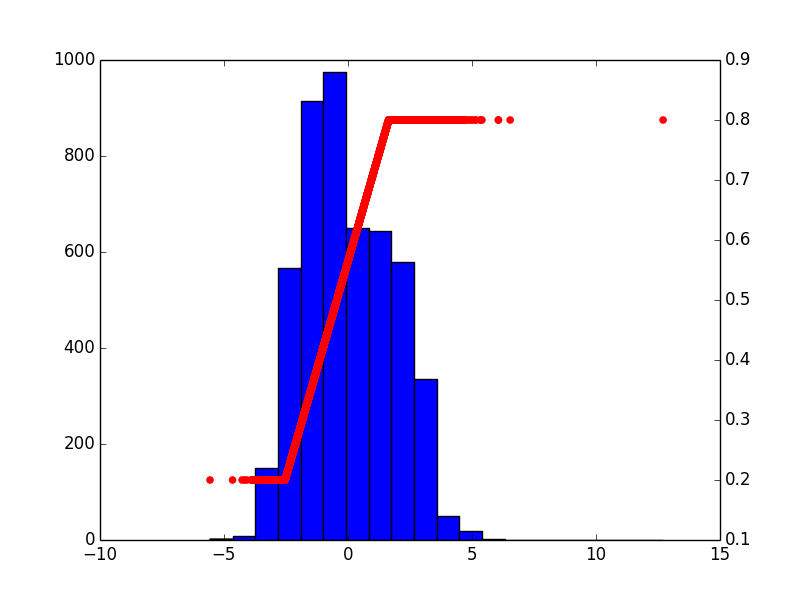

In [8]:
# plot sampling fxn overlay
ax2 = ax.twinx()
ax2.scatter(us,map(p_s,us),color='r')
basic.display_fig_inline(fig)

In [12]:
xs_train, ys_train, ws, xs_test, ys_test = data.sample_data(xs,ys,p_s)
print xs_train.shape, xs_test.shape

(2646, 11) (2252, 11)
